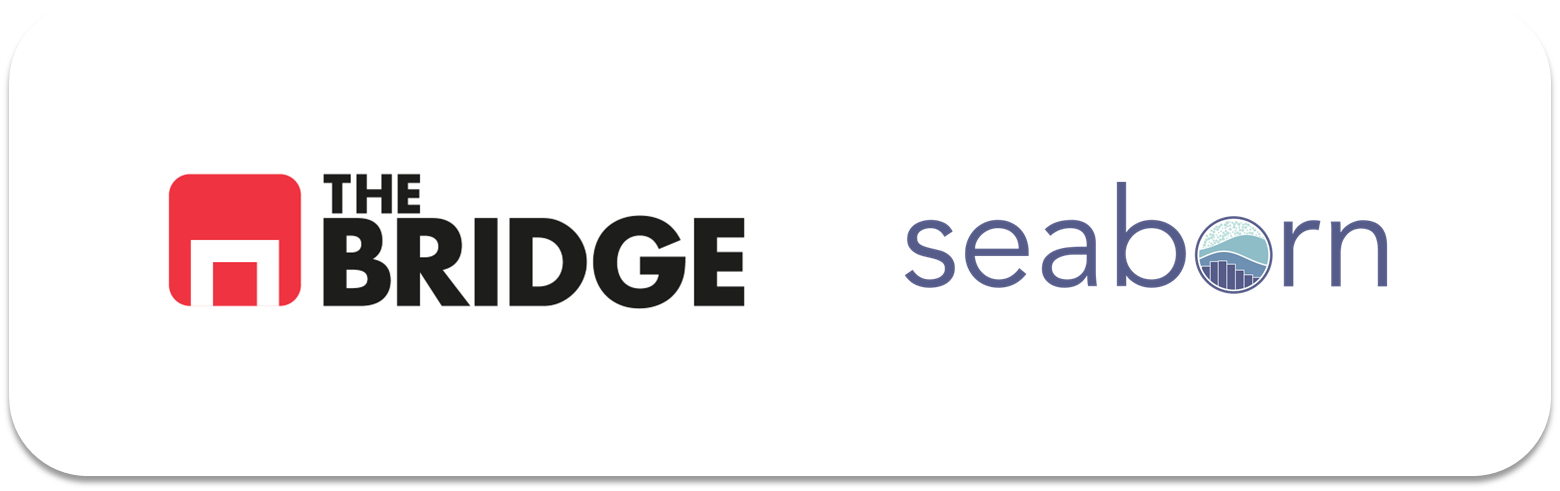

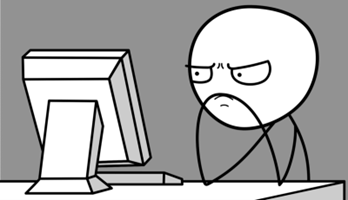

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de una sola variable, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Bitcoin, "./data/BTC.csv"
3. Viajes, "./data/dataset_viajes_jun23"

En el dataset de Bitcoin, convierte la columna "date" a datetime y luego hazla el índice del dataframe.

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_bitcoin = pd.read_csv("./data/BTC.csv")
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

In [6]:
df_bitcoin.date = pd.to_datetime(df_bitcoin["date"])

In [8]:
df_bitcoin.set_index("date", inplace=True)

### Ejercicio 2

Crea una función a la que puedas pasar como argumentos un dataframe y una lista de columnas categóricas y dibuje una matriz de gráficas de 2 columnas y tantas filas como necesite para pintar el diagrama de barras de las frecuencias absolutas de las columnas pasadas como argumento. No hace falta que compruebes que las columnas son categóricas. Y que ponga como título de cada figura "Frecuencias Absolutas de \<nombre de la columna>\. Utiliza Seaborn para dibujar las gráficas y matplotlib para lo que necesites (pero no para dibujar las gráficas)

In [13]:
def graficas_frecuencias(df, columnas):
    """
    Dibuja diagramas de barras de frecuencias absolutas para las columnas categóricas
    de un DataFrame, organizadas en una matriz de 2 columnas y tantas filas como sea necesario.
    
    Parámetros:
        df : DataFrame que contiene los datos.
        columnas : Lista de nombres de columnas categóricas a graficar.
    """
    n = len(columnas)
    n_filas = (n + 1) // 2
    
    fig, axes = plt.subplots(n_filas, 2, figsize=(12, 4 * n_filas))
    axes = axes.flatten()  # Para poder indexar aunque haya 1 fila
    
    for i, col in enumerate(columnas):
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f"Frecuencias Absolutas de {col}")
        axes[i].set_ylabel("Frecuencia")
        axes[i].set_xlabel(col)
    
    
    plt.tight_layout()
    plt.show()

### Ejercicio 3

Utiliza la función anterior para pintar las gráficas de frecuencias de las variables categóricas `alive,embark_town,who` del dataset de titanic


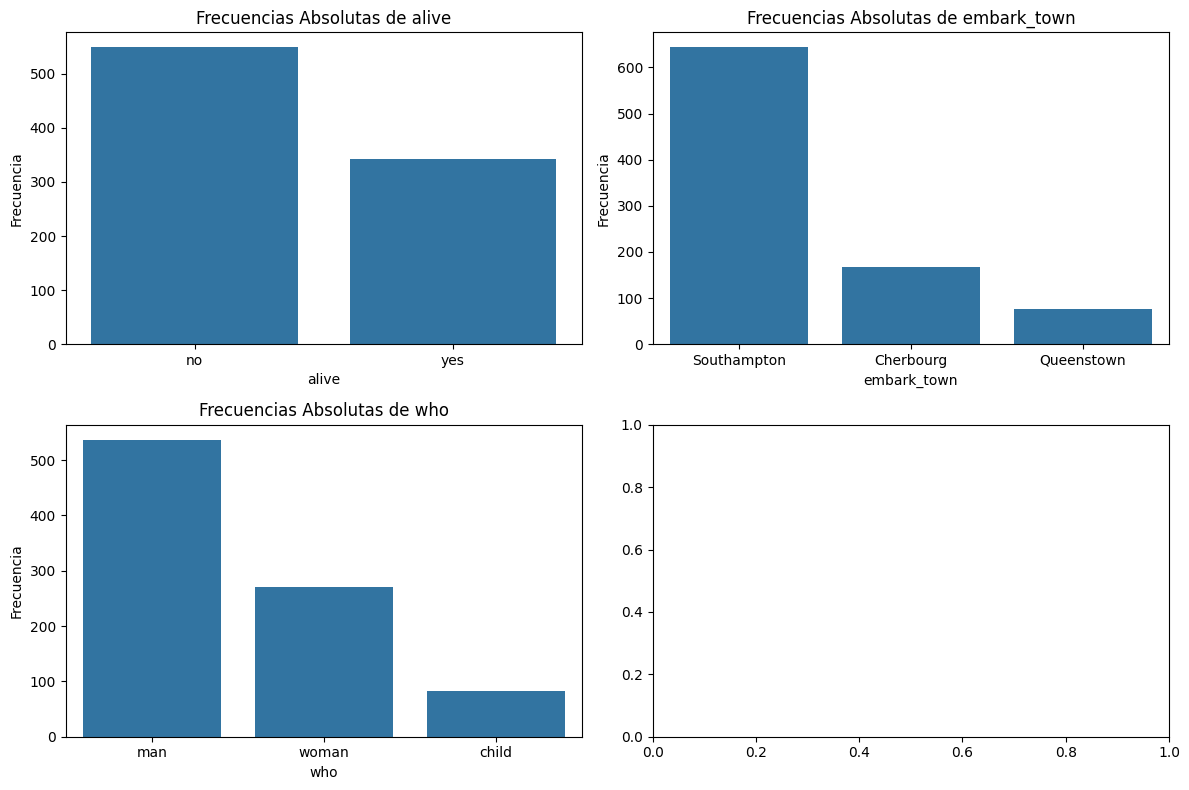

In [15]:
columnas_cat = ["alive", "embark_town","who"]

graficas_frecuencias(df_titanic, columnas_cat)

### Ejercicio 4

Crea una función similar a la del ejercicio 4, pero que esta vez pinte el histograma de una lista de columnas numéricas, añade un argumento para poder indicar el número de bins. Añade también un argumento que permita incluir la función de densidad o no en la figura. De nuevo usa Seaborn para crear las figuras. También debe cumplirse el que pinte cada grafica en una matriz de 2 columnas como mucho y todas las filas que necesites.

In [17]:
def graficas_histogramas(df, columnas, bins = 10, densidad = False):
    """
    Dibuja histogramas para las columnas numericas de un DataFrame, 
    organizadas en una matriz de 2 columnas y tantas filas como sea necesario.
    
    Parámetros:
        df : DataFrame que contiene los datos.
        columnas : Lista de nombres de columnas numericas a graficar.
    """
    n = len(columnas)
    n_filas = (n + 1) // 2
    
    fig, axes = plt.subplots(n_filas, 2, figsize=(12, 4 * n_filas))
    axes = axes.flatten()  # Para poder indexar aunque haya 1 fila
    
    for i, col in enumerate(columnas):
        sns.histplot(data = df,
                     x = col,
                     bins = bins,
                     kde = densidad,
                     ax = axes[i])
        axes[i].set_title(f"Histograma de {col}")
        axes[i].set_ylabel("Frecuencia")
        axes[i].set_xlabel(col)
    
    
    plt.tight_layout()
    plt.show()


### Ejercicio 5

Aplica la función del ejercicio anterior para pintar los histogramas de las columnas "ingresos", "consumo_kg" y "duracion" del dataset de viajes pero aplicando la siguiente lista de bins [10,30,60]. Aunque no seamos muy pro-histrogramas, ¿con cuál las posibles gráficas te quedarías para visualizar los valores de cada variable?

Histogramas con 10 bins


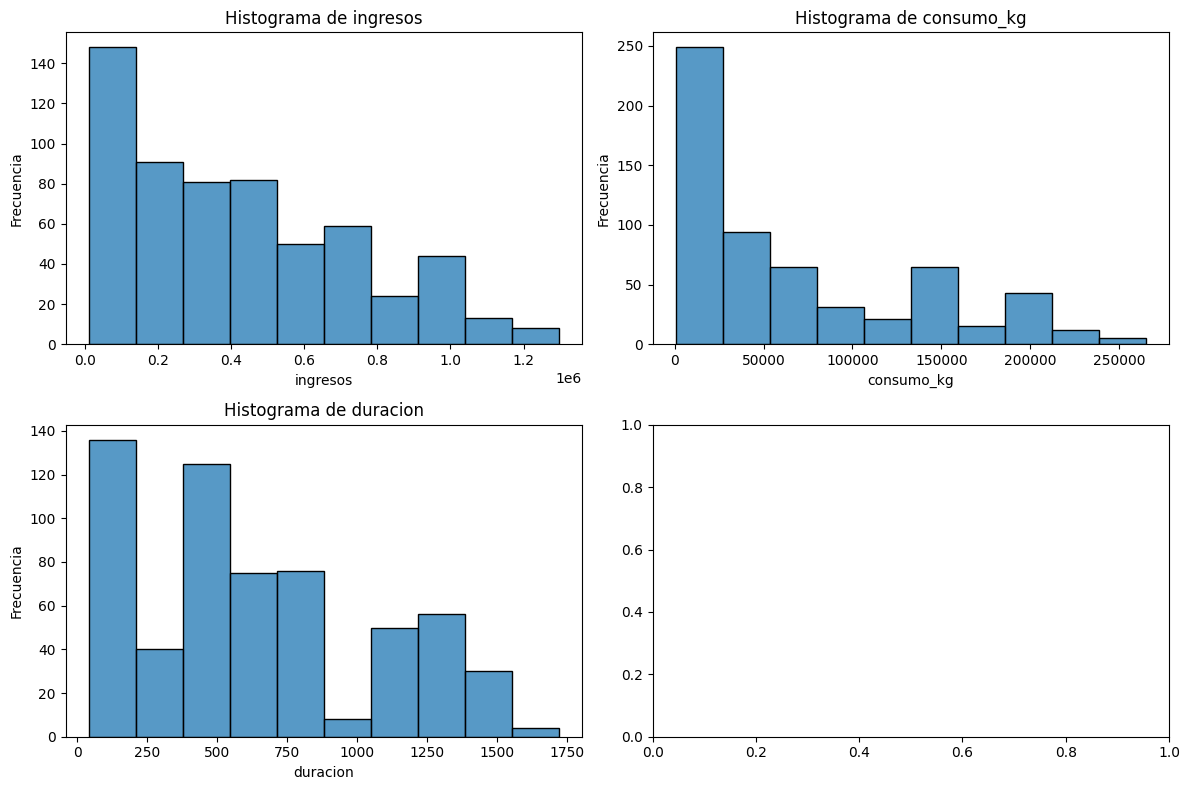

Histogramas con 30 bins


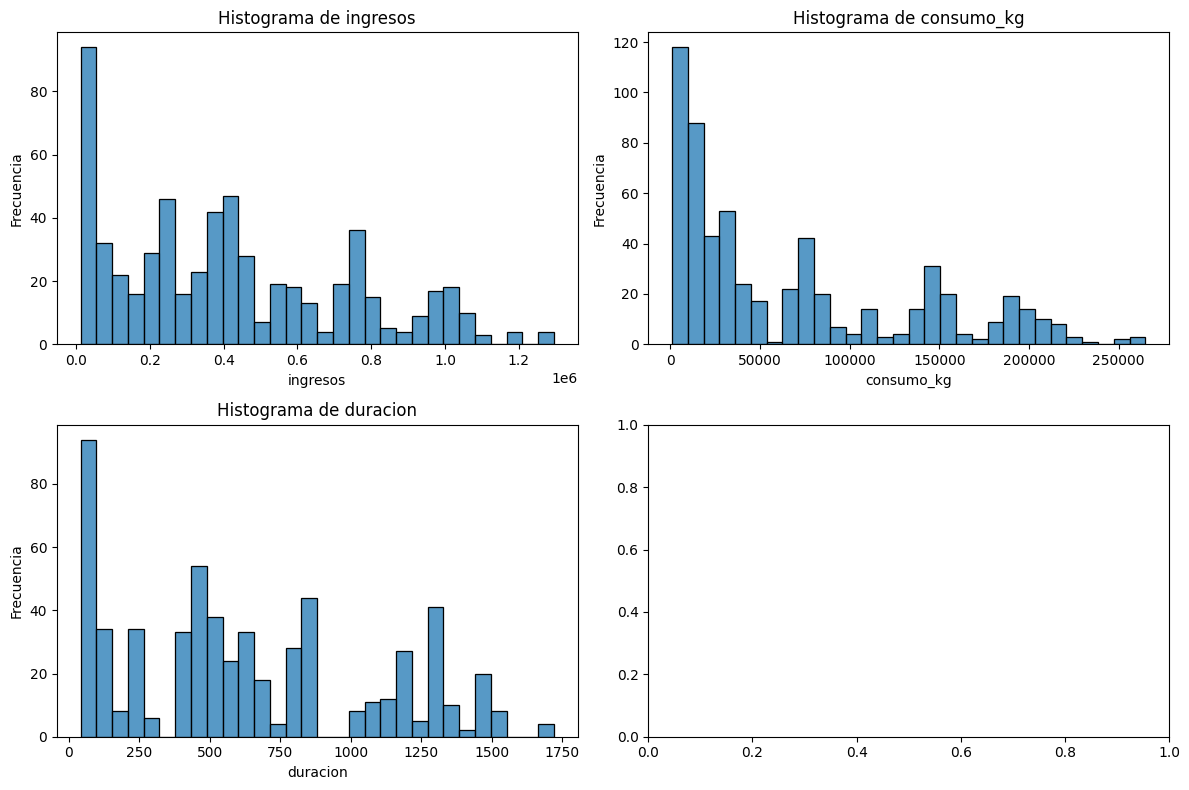

Histogramas con 60 bins


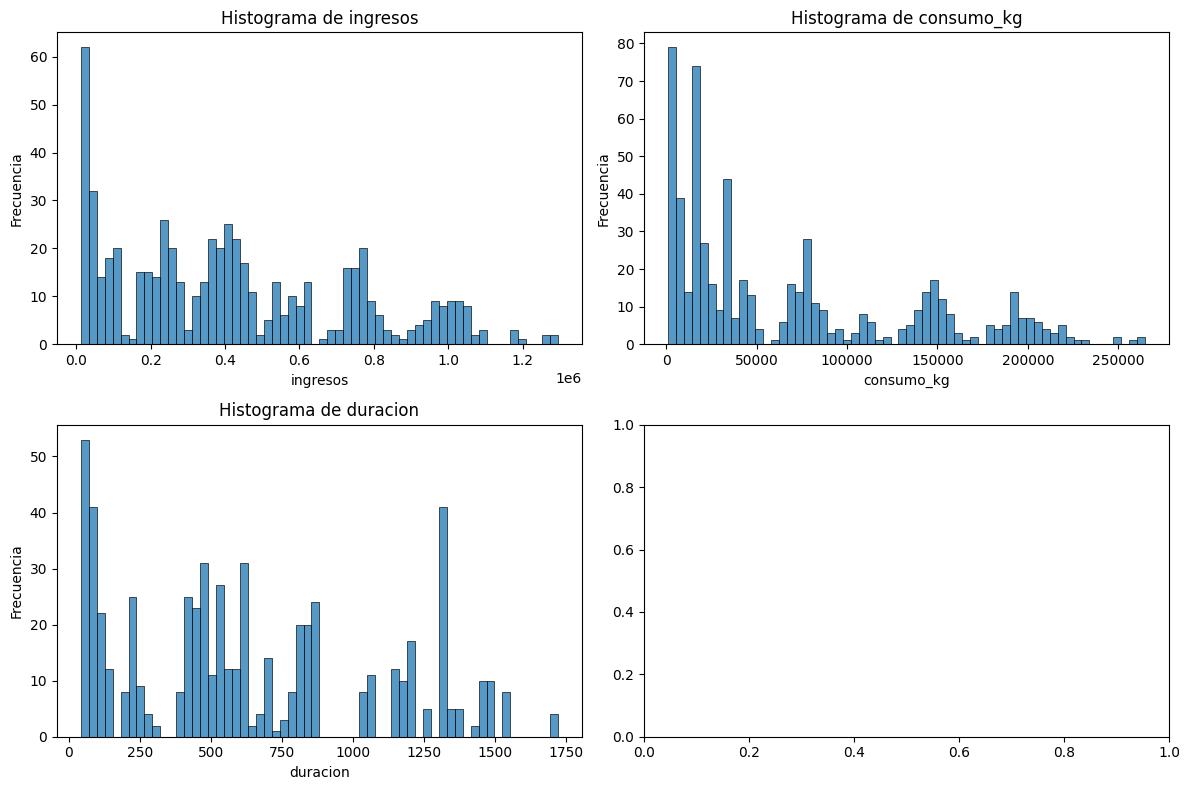

In [18]:
bins_list = [10, 30, 60]
columnas = ["ingresos", "consumo_kg", "duracion"]

for b in bins_list:
    print(f"Histogramas con {b} bins")
    graficas_histogramas(
        df_viajes,
        columnas=columnas,
        bins=b,
        densidad=False
    )

### Ejercicio 6

Construye una función a la que puedas pasar un dataframe y una serie de columnas numéricas (que suponemos son series temporales o secuencias) y que pinte cada columna en una sola gráfica (de nuevo en una matriz de 2 columnas como mucho).

In [ ]:
def graficas_series(df, columnas):

    """
    Dibuja series temporales o secuencias numéricas en una matriz de
    como máximo 2 columnas y tantas filas como sea necesario.
    
    Parámetros:
        df : DataFrame que contiene los datos.
        columnas : Lista de nombres de columnas numéricas a graficar.
    """

    
    n = len(columnas)
    n_filas = (n+1)//2

    fig, axes = plt.subplots(n_filas,2, figsize = (12,4*n_filas))
    axes = axes.flatten()

    for i, col in enumerate(columnas):
        sns.lineplot(
            data = df,
            y = col,
            x = df.index,
            ax = axes[i]
        )
        axes[i].set_title(f"Serie de {col}")
        axes[i].set_ylabel(col)

    plt.tight_layout()
    plt.show()

### Ejercicio 7

Visualiza las columnas `open`,`close`,`high`,`low` del dataset de Bitcoin. 

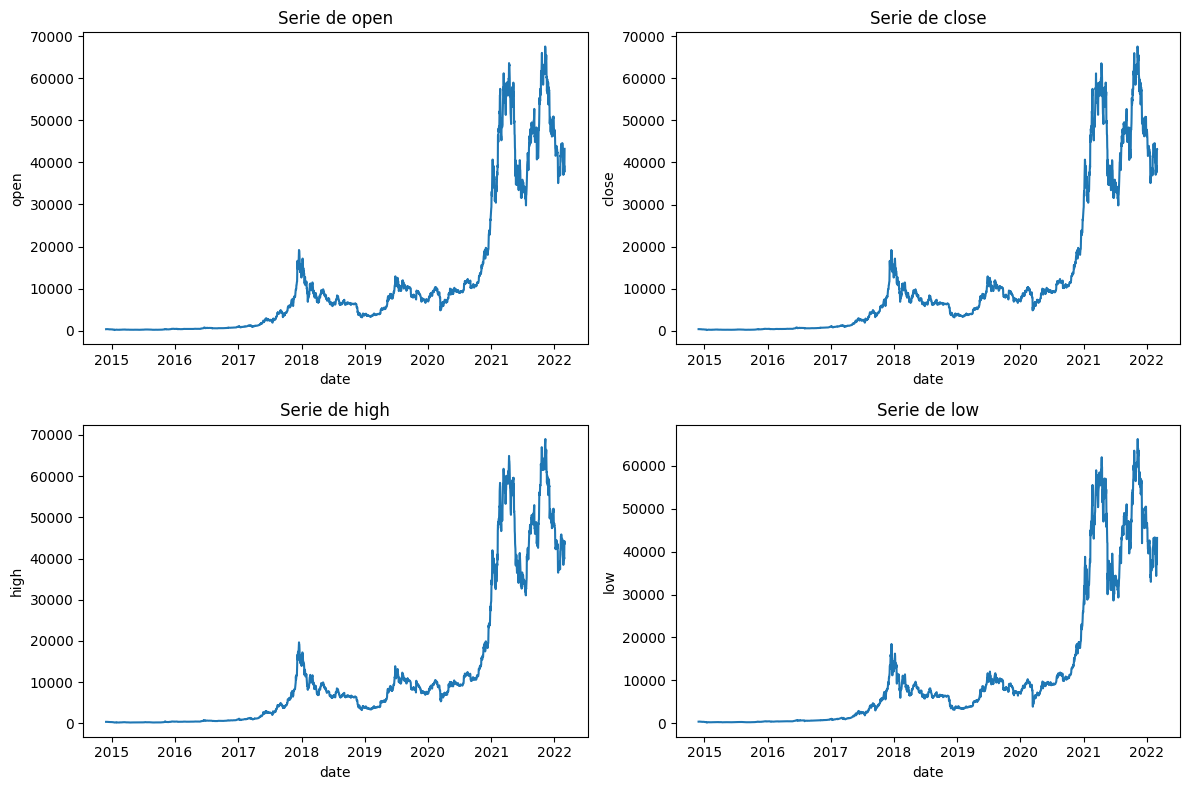

In [27]:
col_numericas = ["open","close","high","low"]

graficas_series(df_bitcoin, col_numericas)


### Ejercicio 8

Añade tres argumentos a la funcion del ejercicio 6. El primero debe permitir pintar una sola gráfica con todas las líneas de evolución juntas y añadir una leyenda. El segundo debe permitir colocar una fecha de inicio y el tercero una fecha de fin. Si no se dan valores a estos argumentos la figura debe contemplarlos todos, si se dan la figura sólo debe mostrar los valores comprendidos entre esas fechas. Supon que la fecha es el índice del DataFrame. De nuevo las gráficas deben estar pintadas con Seaborn.

In [41]:
def graficas_series(df, columnas, juntas = False, fecha_inicio =None, fecha_fin = None):
       
    """
    Dibuja series temporales de columnas numéricas usando Seaborn.
    
    Parámetros:
        df : pd.DataFrame
            DataFrame con índice temporal.
        columnas : list
            Lista de columnas numéricas a graficar.
        juntas : bool
            Si True, pinta todas las series en una sola gráfica con leyenda.
            Si False, pinta una gráfica por columna (máx. 2 columnas).
        fecha_inicio : str o datetime, opcional
            Fecha inicial a mostrar.
        fecha_fin : str o datetime, opcional
            Fecha final a mostrar.
    """
    df = df.sort_index()
    # filtrar por fechas
    if fecha_inicio is not None or fecha_fin is not None:
        df = df.loc[fecha_inicio:fecha_fin]

    # Todas las series en una grafica
    if juntas:
        plt.figure(figsize=(12, 5))
        for col in columnas:
            sns.lineplot(
                data=df,
                x=df.index,
                y=col,
                label=col
            )
        plt.title("Evolución temporal de las series")
        plt.xlabel("Fecha")
        plt.ylabel("Valor")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # Todas las series en graficas seperadas
    else:
        n = len(columnas)
        n_filas = (n+1)//2

        fig, axes = plt.subplots(n_filas,2, figsize = (12,4*n_filas))
        axes = axes.flatten()

        for i, col in enumerate(columnas):
            sns.lineplot(
                data = df,
                y = col,
                x = df.index,
                ax = axes[i]
            )
            axes[i].set_title(f"Serie de {col}")
            axes[i].set_ylabel(col)

        plt.tight_layout()
        plt.show()

### Ejercicio 9

Muestra el periodo más interesante y sólo ese de las variables `open`,`close` (de forma conjunta) del dataset de Bitcoin. Usa la función creada en el ejercicio anterior.

In [37]:
type(df_bitcoin.index)

pandas.core.indexes.datetimes.DatetimeIndex

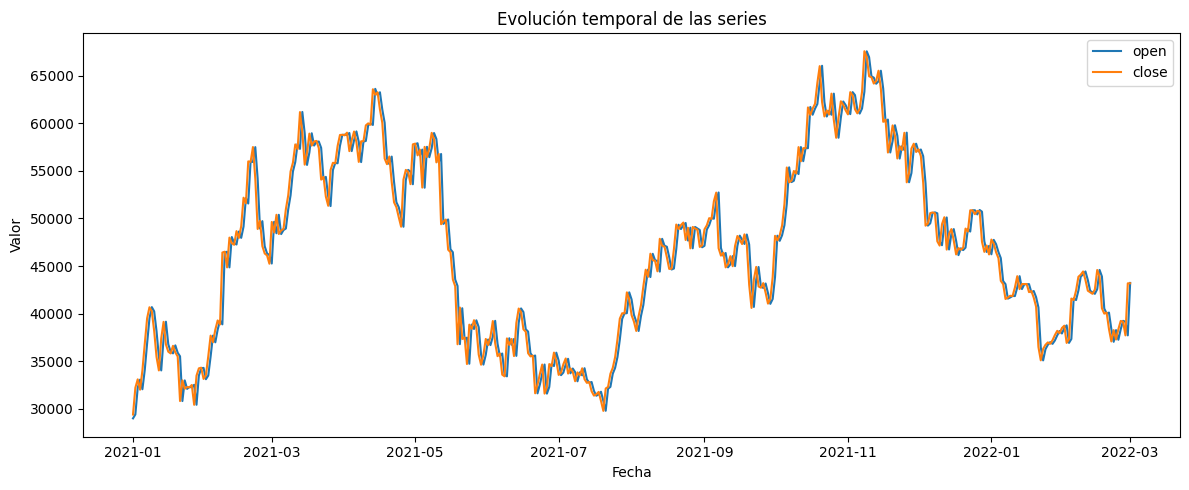

In [42]:
graficas_series(df_bitcoin,["open","close"],juntas = True, fecha_inicio="2021", fecha_fin="2022")
